# **Analyse Health and Demographic Data to identify common traits leading to Heart Disease**
- *Mentored Project under Practo*

## Installation

In [2]:
%%capture
!pip install python-dotenv

## Imporiting

In [3]:
# Data Handling & Visualzation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Model Evaluation
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix, ConfusionMatrixDisplay

# Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.ensemble import  GradientBoostingClassifier,StackingClassifier
from xgboost import XGBClassifier

# Notebook Sync to Github
import gdown, os, pytz, timne, sys
from datetime import datetime
from google.colab import drive
drive.mount('/content/drive')                # Comment this if you are a Guest

random.seed(17)
# pd.set_option("display.max_columns",None)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Sync Notbook to Github
- Create a custom script to auto upload this Colab Notebook to Github.
- It Ensure my Github Notebook is up to date.

In [13]:
# Notebook AutoUpdate to Github
%%capture
if not os.path.exists("/content/NotebookAutoUpdateGithub.py"):
    !wget https://raw.githubusercontent.com/parth-f/Analyse-Health-and-Demographic-Data-to-identify-common-traits-leading-to-Heart-Disease/main/NotebookAutoUpdateGithub.py

# Importing Custom Script for Sync
import NotebookAutoUpdateGithub as notebook

notebook.upload_to_github(
    github_token=os.getenv('SecretKey'), repo_owner="parth-f",
    repo_name="Analyse-Health-and-Demographic-Data-to-identify-common-traits-leading-to-Heart-Disease",
    file_path="/content/drive/MyDrive/Colab Notebooks/Analyse_Health_and_Demogrphic_Data_to_identify_common_traits_leading_to_Heart_Disease-Practo_Certified.ipynb",
    commit_message=f"Autoupdate to Github at {notebook.my_date_time()}"
)

In [14]:
del Note

SyntaxError: invalid syntax (<ipython-input-14-3296b569558f>, line 1)

# **1. Data Ingestion**

In [5]:
# Dataset Name & location
datasets = {
    "LLCP2019.XPT": "https://drive.google.com/uc?id=1qbyAIv1AGF6f4WwY-HyVaPIz2kxZWt25", # Year 2019
    "LLCP2021.XPT": "https://drive.google.com/uc?id=1gzWYlVUZXB2CQeOvlaPo0J1kvA1QoIjB", # Year 2021
    "LLCP2023.XPT": "https://drive.google.com/uc?id=1FPovO1ZkKvxmMzVHx0U8Oqy5hOJIE7QV"  # Year 2023
}

In [6]:
# Accessing the Data
for data, data_url in datasets.items():
    if not os.path.exists(data):
      !cp /content/drive/MyDrive/Project/Heart_ML/Data/* /content/       # For Owner
      # gdown.download(data_url, quiet=True)                             # For Guest - Use this if you are a guest run this notebook

In [12]:
loading_animation()

NameError: name 'loading_animation' is not defined

In [11]:
for data in datasets.keys():

    # Name of the Dataset
    df_name = f"df{data[-6:-4]}"
    print(f"Checking for Dataframe for Year 20{df_name[-2:]}",end=" : ")

    if df_name not in locals():
        print(f"False :-\n\nFor year 20{df_name[-2:]}, Creating New Dataframe {df_name} . . .",end="\r")
        loading_animation()

        locals()[df_name] = pd.read_sas(data, format='xport', encoding='utf-8')
        print(" " * 80, end='\r')
        print(f"New {df_name} Dataframe created.")
        print("---------------------------------------------")

    else:
        print(f"True - {df_name} Dataframe already exists.")
        print("---------------------------------------------")

Checking for Dataframe for Year 2019 : False :-



NameError: name 'loading_animation' is not defined

In [9]:
del df19
del df21
del df23

In [ ]:
datasets = {
    "LLCP2019.XPT": "https://drive.google.com/uc?id=1qbyAIv1AGF6f4WwY-HyVaPIz2kxZWt25",
    "LLCP2021.XPT": "https://drive.google.com/uc?id=1gzWYlVUZXB2CQeOvlaPo0J1kvA1QoIjB",
    "LLCP2023.XPT": "https://drive.google.com/uc?id=1FPovO1ZkKvxmMzVHx0U8Oqy5hOJIE7QV"
}

for data, data_url in datasets.items():
    if not os.path.exists(data):
      !cp /content/drive/MyDrive/Project/Heart_ML/Data/* /content/    # For Owner
      # gdown.download(data_url, quiet=True)                             # For Guest - Use this to run if you are a guest running this notebook

    df_name = f"df{data[-6:-4]}"
    if df_name not in locals():
        locals()[df_name] = pd.read_sas(data, format='xport', encoding='utf-8')
        print(f"{df_name} Dataframe created.")
    else:
        print(f"{df_name} Dataframe already exists.")

df19 Dataframe created.
df21 Dataframe created.
df23 Dataframe created.


In [ ]:
# Columns Name
print( str(df23.shape[1]) + " Columns = " +  str(df23.columns.tolist()))

350 Columns = ['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE', 'SEQNO', '_PSU', 'CTELENM1', 'PVTRESD1', 'COLGHOUS', 'STATERE1', 'CELPHON1', 'LADULT1', 'NUMADULT', 'RESPSLC1', 'LANDSEX2', 'LNDSXBRT', 'SAFETIME', 'CTELNUM1', 'CELLFON5', 'CADULT1', 'CELLSEX2', 'CELSXBRT', 'PVTRESD3', 'CCLGHOUS', 'CSTATE1', 'LANDLINE', 'HHADULT', 'SEXVAR', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH', 'PRIMINS1', 'PERSDOC3', 'MEDCOST1', 'CHECKUP1', 'EXERANY2', 'EXRACT12', 'EXEROFT1', 'EXERHMM1', 'EXRACT22', 'EXEROFT2', 'EXERHMM2', 'STRENGTH', 'BPHIGH6', 'BPMEDS1', 'CHOLCHK3', 'TOLDHI3', 'CHOLMED3', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'ASTHNOW', 'CHCSCNC1', 'CHCOCNC1', 'CHCCOPD3', 'ADDEPEV3', 'CHCKDNY2', 'HAVARTH4', 'DIABETE4', 'DIABAGE4', 'MARITAL', 'EDUCA', 'RENTHOM1', 'NUMHHOL4', 'NUMPHON4', 'CPDEMO1C', 'VETERAN3', 'EMPLOY1', 'CHILDREN', 'INCOME3', 'PREGNANT', 'WEIGHT2', 'HEIGHT3', 'DEAF', 'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'FALL12MN', 'FALLINJ5', 'SMOK

## **Feature Selection**

- Reduced the / from over 300 features to 21 key features by eliminating irrelevant, redundant, and highly correlated columns.
- Retained only meaningful features to ensure relevance and improve the quality of data analysis.

**Selected Features**

- Additionally, rename the variable for better readability


| #  | Original Var. Name   | Variables Rename     | Variable Description                                  |
|----|----------------------|----------------------|-------------------------------------------------------|
| 1  | _MICHD               | **HRT_DIS**          | Ever had Coronary Heart Disease                       |
| 2  | _BMI5                | **BMI**              | Body Mass Index                                       |
| 3  | _AGEG5YR             | **AGE**              | Age in five-year age categories calculated variable (13 groups) |
| 4  | _SEX                 | **GENDER**           | Sex variable - (Male, Female)                         |
| 5  | CVDSTRK3             | **STROKE**           | Ever Diagnosed with a Stroke                          |
| 6  | DIABETE4             | **DIABETES**         | Ever told you had diabetes                            |
| 7  | _LTASTH1             | **ASTHMA**           | Ever told you had asthma                              |
| 8  | GENHLTH              | **GENERAL_HLTH**     | General Health Status                                 |
| 9  | MENTHLTH             | **MENTHLTH_BAD**      | Mental Health Status                                  |
| 10 | PHYSHLTH             | **PHYSHLTH_BAD**    | Days Physical Health Not Good                         |
| 11 | DIFFWALK             | **DIFFICUTLY_WALK**  | Do you have serious difficulty walking or climbing stairs? |
| 12 | _SMOKER3             | **SMOKING**          | Four-level Smoker status                              |
| 13 | _EDUCAG              | **EDUCATION_LVL**    | Level of education completed                          |
| 14 | EMPLOY1              | **EMPLYMNT_STATUS**  | Employment Status        |
| 15 | MARITAL              | **MARITAL_STATUS**          | Marital Status                                        |
| 16 | _CHLDCNT             | **NUM_CHILDERN**     | Number of children in household                       |
| 17 | _URBSTAT             | **URBAN/RURAL**      | Urban/Rural Status                                    |
| 18 | CHCKDNY2             | **KIDNEY_DISEASE**   | Ever told you have kidney disease?                    |
| 19 | _DRDXAR2             | **ARTHRITIS**        | Respondents diagnosed with arthritis                    |
| 20 | BPHIGH4 /  BPHIGH6   | **HIGH_BP**          | Ever Told Blood Pressure High                         |
| 21 | CHOLMED / CHOLMED3    | **HIGH_CHO**         | High Cholesterol                                      |
| 22 | _RFDRHV7 / _RFDRHV8  | **DRINKING**         | Heavy Alcohol Consumption                             |
| 23 | _INCOMG / _INCOMG1   | **INCOME_LVL**       | Income categories                                     |


In [ ]:
# List of Selected Feature
selected_var19 = [ '_MICHD'  , '_BMI5'   , '_AGEG5YR', '_SEX',  'CVDSTRK3', 'DIABETE4', '_LTASTH1', 'GENHLTH' , 'MENTHLTH', 'PHYSHLTH',
                   'DIFFWALK', '_SMOKER3', '_EDUCAG' , 'EMPLOY1',  'MARITAL' , '_CHLDCNT', '_URBSTAT', 'CHCKDNY2',
                   'BPHIGH4',  'CHOLMED2' , '_DRDXAR2', '_RFDRHV7', '_INCOMG'   ]

selected_var21 = [ '_MICHD'  , '_BMI5'   , '_AGEG5YR', '_SEX',  'CVDSTRK3', 'DIABETE4', '_LTASTH1', 'GENHLTH' , 'MENTHLTH', 'PHYSHLTH',
                   'DIFFWALK', '_SMOKER3', '_EDUCAG' , 'EMPLOY1',  'MARITAL' , '_CHLDCNT', '_URBSTAT', 'CHCKDNY2',
                   'BPHIGH6',  'CHOLMED3', '_DRDXAR3', '_RFDRHV7', '_INCOMG1'  ]

selected_var23 = [ '_MICHD'  , '_BMI5'   , '_AGEG5YR', '_SEX', 'CVDSTRK3', 'DIABETE4', '_LTASTH1', 'GENHLTH' , 'MENTHLTH', 'PHYSHLTH',
                   'DIFFWALK', '_SMOKER3', '_EDUCAG' , 'EMPLOY1',  'MARITAL' , '_CHLDCNT', '_URBSTAT', 'CHCKDNY2',
                   'BPHIGH6',  'CHOLMED3', '_DRDXAR2', '_RFDRHV8', '_INCOMG1'  ]

In [ ]:
# Dataframe updates with Selected Featuers
df19 = df19[selected_var19]
df23 = df23[selected_var23]
df21 = df21[selected_var21]

In [ ]:
# Variables Rename Dictonary
var_rename = {
    "_MICHD"   : "HRT_DIS",            "_BMI5"    : "BMI",                  "_AGEG5YR" : "AGE",
    "_SEX"     : "GENDER",             "CVDSTRK3" : "STROKE",               "CHOLMED2" : "HIGH_CHOL",
    "DIABETE4" : "DIABETES",           "_LTASTH1" : "ASTHMA",               "GENHLTH"  : "GENERAL_HLTH",
    "MENTHLTH" : "MENTHLTH_BAD",       "PHYSHLTH" : "PHYSHLTH_BAD",         "DIFFWALK" : "DIFFICUTLY_WALK",
    "_SMOKER3" : "SMOKING",            "_EDUCAG"  : "EDUCATION_LVL",        "EMPLYMNT_STATUS" : "EMPLOY1",
    "MARITAL"  : "MARITAL_STATUS",     "_CHLDCNT" : "NUM_CHILDERN",         "_URBSTAT" : "URBAN/RURAL",
    "CHCKDNY2" : "KIDNEY_DISEASE",     "_DRDXART" : "ARTHRITIS",            "_DRDXAR3" : "ARTHRITIS",
    "_DRDXAR2" : "ARTHRITIS",          "BPHIGH4"  : "HIGH_BP",              "BPHIGH6"  : "HIGH_BP",
    "CHOLMED3" : "HIGH_CHOL",          "CHOLMED2"  : "HIGH_CHOL",            "_RFDRHV7" : "DRINKING",
    "_RFDRHV8" : "DRINKING",           "_INCOMG"  : "INCOME_LVL",           "_INCOMG1" : "INCOME_LVL",
}

In [ ]:
# Rename the Variables
df19.rename(columns=var_rename,inplace =True)
df21.rename(columns=var_rename,inplace =True)
df23.rename(columns=var_rename,inplace =True)

<ipython-input-8-f0c38ae8895d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df19.rename(columns=var_rename,inplace =True)
<ipython-input-8-f0c38ae8895d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df21.rename(columns=var_rename,inplace =True)
<ipython-input-8-f0c38ae8895d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df23.rename(columns=var_rename,inplace =True)


### **1.1 Group Mapping**

In [ ]:
print("Unique Value in df's \n" )
print("df19 - " + str( sorted( df19['INCOME_LVL'].unique().tolist() ) ) )
print("df21 - " + str( sorted( df21['INCOME_LVL'].unique().tolist() ) ) )
print("df23 - " + str( sorted( df23['INCOME_LVL'].unique().tolist() ) ) )

Unique Value in df's 

df19 - [1.0, 2.0, 3.0, 4.0, 5.0, 9.0]
df21 - [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 9.0]
df23 - [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 9.0]


#### **The 2019 Dataset has only 5 Income Groups** :
```
1 ->  Less than $15,000 Notes     
2 ->  $15,000 to < $25,000 Notes   
3 ->  $25,000 to < $35,000 Note    
4 ->  $35,000 to < $50,000 Notes   
5 ->  $50,000 or more Notes        
```
#### **While the 2021 - 23 Dataset has 7 Income Group** :
```
1 ->  Less than $15,000 Notes      
2 ->  $15,000 to < $25,000 Notes   
3 ->  $25,000 to < $35,000 Notes   
4 ->  $35,000 to < $50,000 Notes   
5 ->  $50,000 to < $100,000 Notes  
6 ->  $100,000 to < $200,000 Notes
7 ->  $200,000 or more Notes       
```
- We need to fix this imbalance in the data

In [ ]:
# Printing Count of Values in 5, 6, 7 in df19, df21, df23 respectlively
print(f"df19 =>  5 : {df19['INCOME_LVL'].value_counts()[5]}")
print(f"df21 =>  5 : {df21['INCOME_LVL'].value_counts()[5]}\t 6 : {df21['INCOME_LVL'].value_counts()[6]}\t 7 : {df21['INCOME_LVL'].value_counts()[7]}")
print(f"df23 =>  5 : {df23['INCOME_LVL'].value_counts()[5]}\t 6 : {df23['INCOME_LVL'].value_counts()[6]}\t 7 : {df23['INCOME_LVL'].value_counts()[7]}")

df19 =>  5 : 172045
df21 =>  5 : 107246	 6 : 67411	 7 : 18952
df23 =>  5 : 107027	 6 : 76637	 7 : 26770


In [ ]:
# Counting Values of 5, 6, 7 in df21 and df23
cnt5 = df21['INCOME_LVL'].value_counts()[5] + df23['INCOME_LVL'].value_counts()[5]
cnt6 = df21['INCOME_LVL'].value_counts()[6] + df23['INCOME_LVL'].value_counts()[6]
cnt7 = df21['INCOME_LVL'].value_counts()[7] + df23['INCOME_LVL'].value_counts()[7]

# Calculating Ratio of 5:6:7 distrbtion in df21 + df23 datasets
ratio5 = round(float( cnt5 / ( cnt5 + cnt6 + cnt7 )),3)
ratio6 = round(float( cnt6 / ( cnt5 + cnt6 + cnt7 )),3)
ratio7 = round(float( cnt7 / ( cnt5 + cnt6 + cnt7 )),3)

# Ration of 5, 6, 7 in df21 and df23
print( f"Ratio = {ratio5} : {ratio6} : {ratio7}")

Ratio = 0.53 : 0.357 : 0.113


#### **Ratio of 5, 6, 7 distribution is  5.3 : 3.5 : 1.1  respectively**

In [ ]:
five_indices = df19[df19['INCOME_LVL'] == 5].index

# Shuffling the indices to ensure randomness
shuffled_indices = np.random.permutation(five_indices)

# Calculating the number of samples for each set based on the 4:1:5 ratio 6:7:5
total_length = len(shuffled_indices)
set6_length = int(total_length * ratio6)  # 3.56/10
set7_length = int(total_length * ratio7)  # 1.13/10

# Split the shuffled indices into three sets
set6_indices = shuffled_indices[:set6_length]
set7_indices = shuffled_indices[set6_length : set6_length + set7_length]

df19.loc[set6_indices, 'INCOME_LVL'] = 6
df19.loc[set7_indices, 'INCOME_LVL'] = 7

In [ ]:
# Printing Count of Values in 5, 6, 7 in df19, df21, df23
print(f"df19 =>  5 : {df19['INCOME_LVL'].value_counts()[5]}\t 6 : {df19['INCOME_LVL'].value_counts()[6]}\t 7 : {df19['INCOME_LVL'].value_counts()[7]}")
print(f"df21 =>  5 : {df21['INCOME_LVL'].value_counts()[5]}\t 6 : {df21['INCOME_LVL'].value_counts()[6]}\t 7 : {df21['INCOME_LVL'].value_counts()[7]}")
print(f"df23 =>  5 : {df23['INCOME_LVL'].value_counts()[5]}\t 6 : {df23['INCOME_LVL'].value_counts()[6]}\t 7 : {df23['INCOME_LVL'].value_counts()[7]}")

df19 =>  5 : 91184	 6 : 61420	 7 : 19441
df21 =>  5 : 107246	 6 : 67411	 7 : 18952
df23 =>  5 : 107027	 6 : 76637	 7 : 26770


# **2. Concatinating the Dataframes**

In [ ]:
com_df = pd.concat([df19,df21,df23], axis =0 ,ignore_index=True)

In [ ]:
com_df.shape

(1290284, 23)

# **3. Data Cleaning**

### **3.1 Removing Unwanted Data & Data Transformation**

In [ ]:
com_df.shape

(1290284, 23)

In [ ]:
# com_df['CHOLMED2'].value_counts()

,count
CHOLMED2,
1.0,92042
2.0,51571
7.0,507
9.0,49


In [ ]:
com_df.isna().sum()

,0
HRT_DIS,13545
BMI,123590
AGE,0
GENDER,0
STROKE,17
DIABETES,17
ASTHMA,0
GENERAL_HLTH,34
MENTHLTH_BAD,24
PHYSHLTH_BAD,38


In [ ]:
com_df = com_df.dropna()
com_df.shape

(783071, 23)

In [ ]:
# Custom Column Description Function
def col_description(df,col):
    print("TOTAL COLUMNS : " + str(df[col].shape[0]))
    print(df[col].value_counts())

### **1) HRT_DIS** - Heart Disease

In [ ]:
col_description(com_df,"HRT_DIS")
#  com_df['HRT_DIS']

TOTAL COLUMNS : 1285633
HRT_DIS
2.0    1165081
1.0     107421
Name: count, dtype: int64


In [ ]:
# 1 - Yes - Reported having "Heart Disease"
# 2 - No  - Did not report having "Heart Disease"

com_df.loc[:,'HRT_DIS'] = com_df['HRT_DIS'].replace(2,0)
col_description(com_df,"HRT_DIS")

TOTAL COLUMNS : 1285633
HRT_DIS
0.0    1165081
1.0     107421
Name: count, dtype: int64


### **2) BMI** - Body Mass Index

In [ ]:
com_df['BMI'].unique()

array([2817., 1854., 3162., ..., 6557., 6786., 5406.])

In [ ]:
# BMI/100 - Example 4018 is 40.18 kg
com_df.loc[:,'BMI'] = com_df['BMI'].div(100).round()
com_df['BMI'].unique()

array([ 28.,  19.,  32.,  20.,  21.,  nan,  33.,  31.,  24.,  17.,  22.,
        23.,  26.,  27.,  25.,  35.,  36.,  30.,  16.,  34.,  41.,  29.,
        37.,  42.,  43.,  39.,  38.,  55.,  18.,  40.,  50.,  12.,  45.,
        53.,  48.,  47.,  44.,  52.,  46.,  51.,  57.,  49.,  74.,  59.,
        60.,  15.,  14.,  65.,  54.,  58.,  61.,  63.,  67.,  70.,  13.,
        72.,  56.,  62.,  64.,  68.,  71.,  69.,  76.,  73.,  66.,  92.,
        86.,  77.,  85.,  75.,  79.,  80.,  82., 100.,  87.,  84.,  95.,
        88.,  81.,  78.,  97.,  94.,  89.,  83.,  99.,  96.,  91.,  98.,
        90.])

### **3) AGE** - Age of the Person


 The Age is already Encoded by Age - Age Group.

| Value     | Age Range |
|:----------|:----------|
| 1         | 18 - 24 year old |
| 2         | 25 - 29 year old |
| 3         | 30 - 34 year old |
| 4         | 35 - 39 year old |
| 5         | 40 - 44 year old |
| 6         | 45 - 49 year old |
| 7         | 50 - 54 year old |
| 8         | 55 - 59 year old |
| 9         | 60 - 64 year old |
| 10        | 65 - 69 year old |
| 11        | 70 - 74 year old |
| 12        | 75 - 79 year old |
| 13        | 80 or More year old |

In [ ]:
com_df["AGE"].unique()

array([13., 11., 10., 14., 12.,  8.,  7.,  9.,  6.,  5.,  4.,  1.,  3.,
        2.])

In [ ]:
# Removing 14 -> Refused to Answer
com_df = com_df[com_df['AGE'] != 14]
com_df["AGE"].unique()

array([13., 11., 10., 12.,  8.,  7.,  9.,  6.,  5.,  4.,  1.,  3.,  2.])

### **4) GENDER** - Sex of Respondent

In [ ]:
# 1 - Male, 2 - Female
col_description(com_df,"GENDER")

TOTAL COLUMNS : 1261978
GENDER
2.0    677197
1.0    584781
Name: count, dtype: int64


### **5) STROKE** - Had a Stroke

In [ ]:
col_description(com_df,"STROKE")

TOTAL COLUMNS : 1261978
STROKE
2.0    1205385
1.0      53061
7.0       3259
9.0        270
Name: count, dtype: int64


In [ ]:
# 1 - Yes
# 2 - No
# 7 - Don’t know/Not sure
# 9 - Refused

# Removing 7 and 9
com_df = com_df[com_df['STROKE'] != 7]
com_df = com_df[com_df['STROKE'] != 9]

# Binary Encoding - Converted 2 to zero to make it binary (0 - No, 1- Yes)
com_df.loc[:,'STROKE'] = com_df['STROKE'].replace(2,0)

col_description(com_df,"STROKE")

TOTAL COLUMNS : 1258449
STROKE
0.0    1205385
1.0      53061
Name: count, dtype: int64


### **6) DIABETES** - Ever had Diabetes

In [ ]:
col_description(com_df,"DIABETES")

TOTAL COLUMNS : 1258449
DIABETES
3.0    1046914
1.0     170112
4.0      28946
2.0      10659
7.0       1633
9.0        185
Name: count, dtype: int64


In [ ]:
# 1 - Yes
# 2 - Yes, Only during Pregancy
# 3 - No
# 4 - Told borderline high or pre-hypertensive or elevated blood pressure
# 7 - Don't  know
# 9 - Refuesed

# Convert 4 to 1 as - Yes, (assume borderline to be approximatly bp high ) so considered / True
# Convert 2 to 0 as - Only during Pregancy, is more related to pregancy than high bp so considerd no, thats why 0 / False
# Convert 3 to 9 as - Binary Encoding - 3 = No, which should be zero as (0 - No, 1- Yes)
com_df.loc[:,'DIABETES'] = com_df['DIABETES'].replace({4:1,2:0,3:0})

# Removing 7 and 9
com_df = com_df[com_df['DIABETES'] != 7]
com_df = com_df[com_df['DIABETES'] != 9]

# Column Value Description
col_description(com_df,"DIABETES")

TOTAL COLUMNS : 1256631
DIABETES
0.0    1057573
1.0     199058
Name: count, dtype: int64


### **7) ASTHMA** - Ever had Asthma

In [ ]:
col_description(com_df,"ASTHMA")

TOTAL COLUMNS : 1256631
ASTHMA
1.0    1072468
2.0     180315
9.0       3848
Name: count, dtype: int64


In [ ]:
# Converted 2 to zero to make it binary (0 - No, 1- Yes)
com_df.loc[:,'ASTHMA'] = com_df['ASTHMA'].replace({1:0,2:1})

# Removing 9 (Missing)
com_df = com_df[com_df['ASTHMA'] != 9]

col_description(com_df,"ASTHMA")

TOTAL COLUMNS : 1252783
ASTHMA
0.0    1072468
1.0     180315
Name: count, dtype: int64


### **8) GENERAL_HLTH**

In [ ]:
col_description(com_df,"GENERAL_HLTH")

TOTAL COLUMNS : 1252783
GENERAL_HLTH
2.0    416606
3.0    403119
1.0    201508
4.0    170592
5.0     57998
7.0      2185
9.0       755
Name: count, dtype: int64


In [ ]:
# 1 - Excellent
# 2 - Very Good
# 3 - Good
# 4 - Fair
# 5 - Poor
# 7 , 9 - Values are Missing / Refused to answer

# Removing 7 and 9
com_df = com_df[com_df['GENERAL_HLTH'] != 7]
com_df = com_df[com_df['GENERAL_HLTH'] != 9]

col_description(com_df,"GENERAL_HLTH")

TOTAL COLUMNS : 1249843
GENERAL_HLTH
2.0    416606
3.0    403119
1.0    201508
4.0    170592
5.0     57998
Name: count, dtype: int64


### **9) MENTHLTH_BAD** - Number of Days Mental Health Not Good

In [ ]:
print("TOTAL COLUMNS : " + str( com_df['MENTHLTH_BAD'].shape[0]))
print("UNIQUE VALUES : " + str( com_df['MENTHLTH_BAD'].unique()))

TOTAL COLUMNS : 1249843
UNIQUE VALUES : [88. 30. 77.  4.  1.  2. 15.  5.  7. 10. 25.  3.  6. 21. 20.  8. 14. 99.
 12. 17. 28. 16. 27. 22. 29. 23. 26. 24. 13.  9. 18. 11. 19. nan]


In [ ]:
# Removing 9 ( Refused to ans)

# change 88 to 0 because it means none (no bad mental health days)
com_df.loc[:,'MENTHLTH_BAD'] = com_df['MENTHLTH_BAD'].replace(88,0)

com_df = com_df[com_df['MENTHLTH_BAD'] != 77]
com_df = com_df[com_df['MENTHLTH_BAD'] != 99]

print("TOTAL COLUMNS : " + str( com_df['MENTHLTH_BAD'].shape[0]))
print("UNIQUE VALUES : " + str( com_df['MENTHLTH_BAD'].unique()))

TOTAL COLUMNS : 1227567
UNIQUE VALUES : [ 0. 30.  4.  1.  2. 15.  5.  7. 10. 25.  3.  6. 21. 20.  8. 14. 12. 17.
 28. 16. 27. 22. 29. 23. 26. 24. 13.  9. 18. 11. 19. nan]


### **10) PHYSHLTH_BAD** - Number of Days Physical Health Not Good

In [ ]:
print("TOTAL COLUMNS : " + str( com_df['PHYSHLTH_BAD'].shape[0]))
print("UNIQUE VALUES : " + str( com_df['PHYSHLTH_BAD'].unique()))

TOTAL COLUMNS : 1227567
UNIQUE VALUES : [15. 10. 88. 30. 20.  1.  7.  2. 14.  3.  5. 12. 77. 25.  6.  4. 28. 21.
 17.  8. 27. 99. 16. 23. 18. 13. 29. 11. 19.  9. 24. 26. 22. nan]


In [ ]:
# 77 - Don't know for Sure
# 88 - None
# 99 - Refused

# change 88 to 0 because it means none (no phsycial activity)
com_df['PHYSHLTH_BAD'] = com_df['PHYSHLTH_BAD'].replace(88,0)

# Removing 77 and 99
com_df = com_df[com_df['PHYSHLTH_BAD'] != 77]
com_df = com_df[com_df['PHYSHLTH_BAD'] != 99]

print("TOTAL COLUMNS : " + str( com_df['PHYSHLTH_BAD'].shape[0]))
print("UNIQUE VALUES : " + str( com_df['PHYSHLTH_BAD'].unique()))

TOTAL COLUMNS : 1206250
UNIQUE VALUES : [15. 10.  0. 30. 20.  1.  7.  2. 14.  3.  5. 12. 25.  6.  4. 28. 21. 17.
  8. 27. 16. 23. 18. 13. 29. 11. 19.  9. 24. 26. 22. nan]


### **11) DIFFICUTLY_WALK** - Has Difficulty Walking

In [ ]:
col_description(com_df,"DIFFICUTLY_WALK")

TOTAL COLUMNS : 1206250
DIFFICUTLY_WALK
2.0    975451
1.0    184776
7.0      2783
9.0       749
Name: count, dtype: int64


In [ ]:
# 1 - Yes
# 2 - No
# 7 - Don't know
# 9 - Refuseed

# Binary Encoding
com_df.loc[:,'DIFFICUTLY_WALK'] = com_df['DIFFICUTLY_WALK'].replace(2,0)

# Removing 7 and 9
com_df = com_df[com_df['DIFFICUTLY_WALK'] != 7]
com_df = com_df[com_df['DIFFICUTLY_WALK'] != 9]

col_description(com_df,"DIFFICUTLY_WALK")

TOTAL COLUMNS : 954831
DIFFICUTLY_WALK
0.0    799015
1.0    155816
Name: count, dtype: int64


### **12) SMOKING** - Smoking Status

In [ ]:
col_description(com_df,"SMOKING")

TOTAL COLUMNS : 1206250
SMOKING
4.0    685756
3.0    317080
1.0    103558
9.0     58296
2.0     41560
Name: count, dtype: int64


In [ ]:
# 1 - Everyday Smoker - 4
# 2 - Someday Smoker - 3
# 3 - Former Smoker - 2
# 4 - Never Smoked - 1
# 9 - Refused / Missing

# Revising the Order from Never Smoked to a Smoker
com_df['SMOKING'] = com_df['SMOKING'].replace({1:44, 2:33, 3:22, 4:11})
com_df['SMOKING'] = com_df['SMOKING'].replace({11:1, 22:2, 33:3, 44:4})

# Removing 9
com_df = com_df[com_df['SMOKING'] != 9]

col_description(com_df,"SMOKING")

TOTAL COLUMNS : 1147954
SMOKING
1.0    685756
2.0    317080
4.0    103558
3.0     41560
Name: count, dtype: int64


### **13) EDUCATION_LVL** - Education Level

In [ ]:
col_description(com_df,"EDUCATION_LVL")

TOTAL COLUMNS : 1147954
EDUCATION_LVL
4.0    474375
3.0    314722
2.0    288406
1.0     67648
9.0      2803
Name: count, dtype: int64


In [ ]:
# 1 - Not Graduated High School
# 2 - Graduated High School
# 3 - Attended College
# 4 - Graduated College
# 9 - Don't know / Missing

# Removing 9
com_df = com_df[com_df['EDUCATION_LVL'] != 9]

col_description(com_df,"EDUCATION_LVL")

TOTAL COLUMNS : 1145151
EDUCATION_LVL
4.0    474375
3.0    314722
2.0    288406
1.0     67648
Name: count, dtype: int64


### **14) MARITAL_STATUS** - Marital Status of the Person

In [ ]:
col_description(com_df,"MARITAL_STATUS")

TOTAL COLUMNS : 1145151
MARITAL_STATUS
1.0    597813
5.0    199615
2.0    147857
3.0    124784
6.0     46991
4.0     22154
9.0      5918
Name: count, dtype: int64


In [ ]:
# 1 - Married
# 2 - Divorced
# 3 - Widowed
# 4 - Seperated
# 5 - Never Married
# 6 - A member of an unmarried couple

# 9 - Removing because Refused to ans
com_df = com_df[com_df['MARITAL_STATUS'] != 9]

col_description(com_df,"MARITAL_STATUS")

TOTAL COLUMNS : 1139233
MARITAL_STATUS
1.0    597813
5.0    199615
2.0    147857
3.0    124784
6.0     46991
4.0     22154
Name: count, dtype: int64


### **15) NUM_CHILDERN** - Num of Children

In [ ]:
col_description(com_df,"NUM_CHILDERN")

TOTAL COLUMNS : 1139233
NUM_CHILDERN
1.0    841005
2.0    122324
3.0    102684
4.0     43082
5.0     16062
6.0      8618
9.0      5458
Name: count, dtype: int64


In [ ]:
# 1 - No childern
# 2 - 1 Child
# 3 - 2 Children
# 4 - 3 Childern
# 5 - 4 Children
# 6 - 5 or More Childern

# 9 - Don't know
com_df = com_df[com_df['NUM_CHILDERN'] != 9]

col_description(com_df,"NUM_CHILDERN")

TOTAL COLUMNS : 1133775
NUM_CHILDERN
1.0    841005
2.0    122324
3.0    102684
4.0     43082
5.0     16062
6.0      8618
Name: count, dtype: int64


### **16) URBAN/RURAL** - Does the Person live in Urban or Rural Area

In [ ]:
# 1 - Urban
# 2 - Rural
col_description(com_df,"URBAN/RURAL")

TOTAL COLUMNS : 1133775
URBAN/RURAL
1.0    951824
2.0    159948
Name: count, dtype: int64


### **17) KIDNEY_DISEASE** - Every Had Kidney Disease

In [ ]:
col_description(com_df,"KIDNEY_DISEASE")

TOTAL COLUMNS : 1133775
KIDNEY_DISEASE
2.0    1083606
1.0      46883
7.0       3199
9.0         85
Name: count, dtype: int64


In [ ]:
# 1 - Yes
# 2 - No
# 7 - Don't know
# 9 - Refuseed

# Binary Encoding (No - 0)
com_df.loc[:,'KIDNEY_DISEASE'] = com_df['KIDNEY_DISEASE'].replace(2,0)

# Removing 7 and 9
com_df = com_df[com_df['KIDNEY_DISEASE'] != 7]
com_df = com_df[com_df['KIDNEY_DISEASE'] != 9]

col_description(com_df,"KIDNEY_DISEASE")

TOTAL COLUMNS : 1130491
KIDNEY_DISEASE
0.0    1083606
1.0      46883
Name: count, dtype: int64


### **18) HIGH_BP** - High Blood Pressure

In [ ]:
col_description(com_df,"HIGH_BP")

TOTAL COLUMNS : 1130491
HIGH_BP
3.0    655216
1.0    452407
4.0     11326
2.0      8703
7.0      2370
9.0       469
Name: count, dtype: int64


In [ ]:
# Convert 3 to 9 as - Binary Encoding - 3 = No, which should be zero as (0 - No, 1- Yes)
com_df.loc[:,'HIGH_BP'] = com_df['HIGH_BP'].replace({2:0,3:0,4:0.5})

# Removing 7 & 9
com_df = com_df[com_df['HIGH_BP'] != 7]
com_df = com_df[com_df['HIGH_BP'] != 9]

col_description(com_df,"HIGH_BP")

TOTAL COLUMNS : 1127652
HIGH_BP
0.0    663919
1.0    452407
0.5     11326
Name: count, dtype: int64


### **19) HIGH CHOLESTEROL** - High Cholesterol

In [ ]:
col_description(com_df,"HIGH_CHOL")

TOTAL COLUMNS : 1290284
HIGH_CHOL
2.0    566729
1.0    329794
7.0      3484
9.0      1167
Name: count, dtype: int64


In [ ]:
# Change 2 to 0 because it is No
com_df.loc[:,'HIGH_CHOL'] = com_df['HIGH_CHOL'].replace(2,0)

# Remove all 7 (dont knows)
# Remove all 9 (refused)
com_df = com_df[com_df['HIGH_CHOL'] != 7]
com_df = com_df[com_df['HIGH_CHOL'] != 9]

col_description(com_df,"HIGH_CHOL")

TOTAL COLUMNS : 1127652
HIGH_CHOL
0.0    499668
1.0    290698
Name: count, dtype: int64


### **20) DRINKING** - Are you Drinking

In [ ]:
col_description(com_df,"DRINKING")

TOTAL COLUMNS : 1127652
DRINKING
1.0    1031444
2.0      66628
9.0      29580
Name: count, dtype: int64


In [ ]:
# Binary Encoding - Converted 2 to zero to make it binary (0 - No, 1- Yes)
com_df.loc[:,'DRINKING'] = com_df['DRINKING'].replace({1:0,2:1})


# 9 - Don't know / Refused
com_df = com_df[com_df['DRINKING'] != 9]

col_description(com_df,"DRINKING")

TOTAL COLUMNS : 1098072
DRINKING
0.0    1031444
1.0      66628
Name: count, dtype: int64


### **21) INCOME_LVL** - Income Level Bracket of the Respondent

In [ ]:
col_description(com_df,"INCOME_LVL")

TOTAL COLUMNS : 1098072
INCOME_LVL
5.0    279592
6.0    189923
9.0    172462
4.0    127188
2.0    104114
3.0    102319
1.0     62087
7.0     60387
Name: count, dtype: int64


In [ ]:
# 1 - Less than $ 15,000
# 2 - $15,000 to < $25,000
# 3 - $25,000 to < $35,000
# 4 - $35,000 to < $50,000
# 5 - $50,000 to < $100,000
# 6 - $100,000 to < $200,000
# 7 - $200,000 or More

# 9 - Removing - ( Don't know / Missing val )
com_df = com_df[com_df['INCOME_LVL'] != 9]

col_description(com_df,"INCOME_LVL")

TOTAL COLUMNS : 925610
INCOME_LVL
5.0    279592
6.0    189923
4.0    127188
2.0    104114
3.0    102319
1.0     62087
7.0     60387
Name: count, dtype: int64


# **4. Data Transformation**

In [ ]:
com_df.corr()['HRT_DIS'].dropna().drop('HRT_DIS').sort_values(ascending=False)

,HRT_DIS
HIGH_CHOL,0.265323
GENERAL_HLTH,0.232139
AGE,0.228648
HIGH_BP,0.209195
EMPLOY1,0.207445
STROKE,0.193093
DIABETES,0.175336
PHYSHLTH_BAD,0.173292
KIDNEY_DISEASE,0.148223
SMOKING,0.079877


In [ ]:
com_df.corr()

,HRT_DIS,BMI,AGE,GENDER,STROKE,DIABETES,ASTHMA,GENERAL_HLTH,MENTHLTH_BAD,PHYSHLTH_BAD,DIFFICUTLY_WALK,SMOKING,EDUCATION_LVL,EMPLOY1,MARITAL_STATUS,NUM_CHILDERN,URBAN/RURAL,KIDNEY_DISEASE,HIGH_BP,HIGH_CHOL,ARTHRITIS,DRINKING,INCOME_LVL
HRT_DIS,1.000000,0.043287,0.228648,-0.076242,0.193093,0.175336,0.039453,0.232139,0.036544,0.173292,-0.163344,0.079877,-0.069578,0.207445,-0.037901,-0.098044,0.031876,0.148223,0.209195,0.265323,-0.159008,-0.027571,-0.111277
BMI,0.043287,1.000000,-0.006015,-0.006058,0.014991,0.214567,0.098989,0.241190,0.075908,0.116190,-0.151994,-0.010515,-0.082792,-0.007182,-0.017662,0.030813,0.028644,0.051079,0.219105,0.095962,-0.134521,-0.035527,-0.069056
AGE,0.228648,-0.006015,1.000000,0.039848,0.138848,0.221652,-0.056320,0.152515,-0.166584,0.109430,-0.189956,0.035810,-0.003787,0.540106,-0.308776,-0.391478,0.074234,0.134229,0.381787,0.425953,-0.371064,-0.053241,-0.078359
GENDER,-0.076242,-0.006058,0.039848,1.000000,-0.003348,-0.020799,0.076639,0.015486,0.089388,0.040961,-0.053562,-0.052389,0.027829,0.076623,0.007859,0.031348,0.005723,0.009098,-0.055902,-0.066082,-0.094846,-0.005274,-0.106304
STROKE,0.193093,0.014991,0.138848,-0.003348,1.000000,0.108805,0.038536,0.163233,0.051920,0.139186,-0.140312,0.057521,-0.058472,0.155512,-0.007978,-0.060116,0.015477,0.093779,0.134937,0.139126,-0.104199,-0.017843,-0.109740
DIABETES,0.175336,0.214567,0.221652,-0.020799,0.108805,1.000000,0.048387,0.275396,0.037302,0.165862,-0.173988,0.031076,-0.094814,0.192178,-0.033468,-0.100562,0.023128,0.157389,0.277786,0.308885,-0.157182,-0.059292,-0.138283
ASTHMA,0.039453,0.098989,-0.056320,0.076639,0.038536,0.048387,1.000000,0.135374,0.122090,0.122913,-0.085409,0.031117,-0.012939,0.029188,0.049937,0.010497,-0.011647,0.037733,0.036040,0.002921,-0.094965,-0.003186,-0.067070
GENERAL_HLTH,0.232139,0.241190,0.152515,0.015486,0.163233,0.275396,0.135374,1.000000,0.278289,0.506530,-0.332274,0.182211,-0.234374,0.250982,0.053551,-0.077933,0.039643,0.174984,0.272977,0.214610,-0.270584,-0.023123,-0.317875
MENTHLTH_BAD,0.036544,0.075908,-0.166584,0.089388,0.051920,0.037302,0.122090,0.278289,1.000000,0.317001,-0.137532,0.139743,-0.078512,0.028436,0.135076,0.035067,-0.015437,0.036909,0.011925,-0.032058,-0.076893,0.045397,-0.166582
PHYSHLTH_BAD,0.173292,0.116190,0.109430,0.040961,0.139186,0.165862,0.122913,0.506530,0.317001,1.000000,-0.356943,0.127212,-0.123255,0.236503,0.024235,-0.063449,0.022067,0.143703,0.152172,0.116556,-0.251271,-0.018346,-0.227934


### **VISUAL DATAFRAME** - Creating Dataframe for Data Visualization

In [ ]:
vis_df = com_df.copy()

In [ ]:
# # Float Columns convert to dtype to Integer
# convert_to_int = ['BMI', 'MENTHLTH_BAD', 'PHYSHLTH_BAD']
# vis_df[convert_to_int] = vis_df[convert_to_int].astype(int)

# # Binary Columns (0:"NO", 1:"YES")
# binary_columns = ["HRT_DIS", "STROKE", "DIABETES", "ASTHMA", "DIFFICUTLY_WALK", "KIDNEY_DISEASE", "HIGH_BP", "HIGH_CHOL", "DRINKING"]
# vis_df[binary_columns] = vis_df[binary_columns].replace({0: "NO", 1: "YES"})

# # Label Columns
# vis_df['GENDER']        = vis_df['GENDER'].replace({        1:"MALE",        2:"FEMALE"})
# vis_df['AGE']           = vis_df['AGE'].replace({           1:"18 - 24",     2:"25 - 29",   3: "30 - 34",   4: "35 - 39",   5: "40 - 44", 6: "45 - 49", 7: "50 - 54", 8: "55 - 59", 9: "60 - 64", 10: "65 - 69", 11: "70 - 74", 12: "75 - 79", 13: "80 - 80+"})
# vis_df['GENERAL_HLTH']  = vis_df['GENERAL_HLTH'].replace({  1:"Excellent",   2:"Very Good", 3:"Good",       4:"Fair",       5:"Poor"})
# vis_df['SMOKING']       = vis_df['SMOKING'].replace({       1:"Never",       2:"Former",    3:"Someday",    4:"Everyday"})
# vis_df['EDUCATION_LVL'] = vis_df['EDUCATION_LVL'].replace({ 1:"Attended High School", 2:"Graduated High School", 3:"Attended College", 4:"Graduated College"})
# vis_df['MARITAL_STATUS'] = vis_df['MARITAL_STATUS'].replace({ 1:"Married",     2:"Divorced",  3:"Widowed",    4:"Seperated",  5:"Never Married", 6:"Unmarried couple"})
# vis_df['NUM_CHILDERN']  = vis_df['NUM_CHILDERN'].replace({  1:"No Children", 2:"1 Child",   3:"2 Children", 4:"3 Children", 5:"4 Children", 6:"5 or More Children"})
# vis_df['URBAN/RURAL']   = vis_df['URBAN/RURAL'].replace({   1:"Urban",       2:"Rural"})
# vis_df['INCOME_LVL']    = vis_df['INCOME_LVL'].replace({    1:"Less than $15,000", 2:"$15,000 - < $25,000", 3:"$25,000 - < $35,000", 4:"$35,000 - < $50,000", 5:"$50,000 - < $100,000", 6:"$100,000 - < $200,000", 7:"More than $200,000"})

# # Category Columns Creation
# vis_df['AGE']           = pd.Categorical(vis_df['AGE'],           categories=["18 - 24", "25 - 29", "30 - 34", "35 - 39", "40 - 44", "45 - 49", "50 - 54", "55 - 59", "60 - 64", "65 - 69", "70 - 74", "75 - 79", "80 - 80+"], ordered=True)
# vis_df['GENERAL_HLTH']  = pd.Categorical(vis_df['GENERAL_HLTH'],  categories=['Poor', 'Fair', 'Good', 'Very Good', 'Excellent'], ordered=True)
# vis_df['SMOKING']       = pd.Categorical(vis_df['SMOKING'],       categories=['Never', 'Former', 'Someday', 'Everyday'],         ordered=True)
# vis_df['EDUCATION_LVL'] = pd.Categorical(vis_df['EDUCATION_LVL'], categories=['Attended High School', 'Graduated High School', 'Attended College', 'Graduated College' ], ordered=True)
# vis_df['NUM_CHILDERN']  = pd.Categorical(vis_df['NUM_CHILDERN'],  categories=['No Children', '1 Child', '2 Children',  '3 Children', '4 Children', '5 or More Children'], ordered=True)
# vis_df['INCOME_LVL']    = pd.Categorical(vis_df['INCOME_LVL'],    categories=["Less than $15,000", "$15,000 - < $25,000", "$25,000 - < $35,000", "$35,000 - < $50,000", "$50,000 - < $100,000", "$100,000 - < $200,000", "More than $200,000"], ordered=True)

In [ ]:
for x in vis_df.columns:
    print(str(x) + ", <" + str(vis_df[x].dtypes) + "> :\t" + str(vis_df[x].unique()))

HRT_DIS, <float64> :	[ 0.  1. nan]
BMI, <float64> :	[ 28.  19.  32.  33.  17.  22.  26.  27.  23.  31.  35.  36.  24.  30.
  16.  34.  41.  nan  37.  25.  20.  42.  39.  21.  29.  55.  18.  43.
  40.  50.  38.  45.  48.  47.  44.  52.  46.  51.  57.  49.  60.  15.
  54.  58.  61.  53.  63.  67.  59.  13.  70.  14.  56.  62.  64.  68.
  12.  69.  72.  74.  65.  66.  92.  75.  79.  80.  82.  87.  73.  86.
  71.  95.  88.  76.  85.  81.  84.  77.  97.  99.  83.  78.  91.  98.
  96.  90.  94.  89. 100.]
AGE, <float64> :	[13. 11. 10. 12.  7.  6.  5.  8.  9.  4.  3.  2.  1.]
GENDER, <float64> :	[2. 1.]
STROKE, <float64> :	[ 0.  1. nan]
DIABETES, <float64> :	[0. 1.]
ASTHMA, <float64> :	[0. 1.]
GENERAL_HLTH, <float64> :	[ 3.  4.  2.  5.  1. nan]
MENTHLTH_BAD, <float64> :	[ 0. 30.  4.  1.  2. 15.  5. 10.  7. 25.  3.  6. 20.  8. 14. 21. 17. 28.
 12. 16. 27. 26. 29. 24. 13.  9. 18. 23. 22. 19. 11. nan]
PHYSHLTH_BAD, <float64> :	[15. 10.  0. 30. 20.  1.  2.  7. 14. 12.  5. 25.  4.  6.  3. 21.  8. 

# **5. Data Visualization**

In [ ]:
df = com_df.copy()

ValueError: The number of FixedLocator locations (21), usually from a call to set_ticks, does not match the number of labels (23).

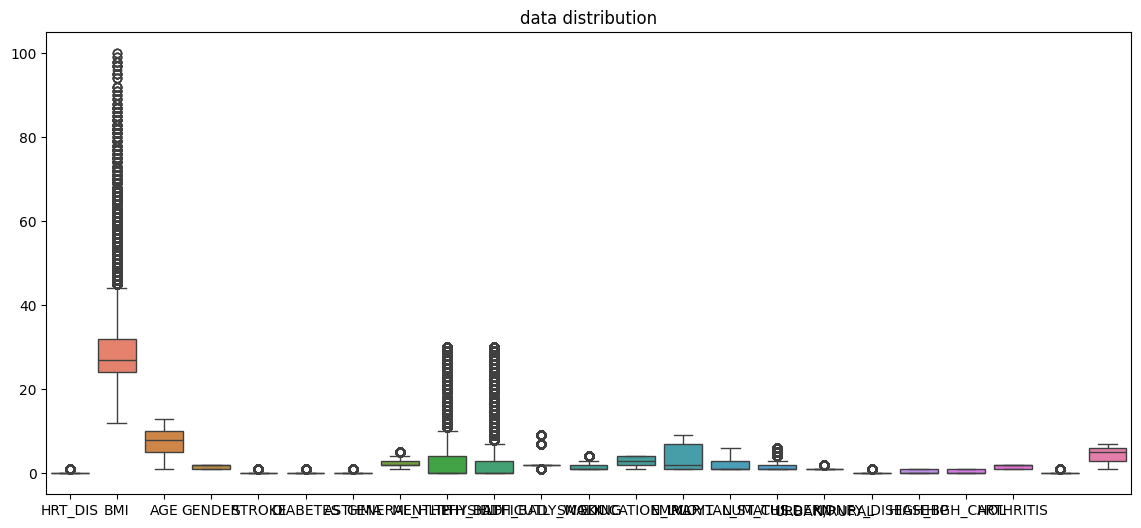

In [ ]:

plt.figure(figsize=(14,6))
sns.boxplot(df)
l=list(np.arange(21))
plt.title("data distribution")
plt.xticks(l, list(df.columns), rotation=90)
plt.show()

In [ ]:
def plotaxis(pval,paxis):
  q1 = np.percentile(df[pval], 25)
  q2 = np.percentile(df[pval], 50)
  q3 = np.percentile(df[pval], 75)

  paxis.text(q2, 0.1, f'Median = {q2:.1f}', color='darkred', verticalalignment='bottom', rotation=90)

  paxis.axvline(q1, color='green', linestyle='--')
  paxis.axvline(q2, color='red', linestyle='-', label='Q2')
  paxis.axvline(q3, color='blue', linestyle='--')

fig, axes = plt.subplots(3, 2, figsize=(18, 10))

sns.boxplot(ax=axes[0, 0], x=df['BMI'], color='#a89444')
# axes[0, 0].set_title('BMI Distribution')
plotaxis('BMI',axes[0, 0])

sns.boxplot(ax=axes[0, 1], x=df['GENERAL_HLTH'], color='#72b6a1')
# axes[0, 1].set_title('General Health Distribution')
plotaxis('GENERAL_HLTH',axes[0, 1])

sns.boxplot(ax=axes[1, 0], x=df['MENTHLTH_BAD'], color='#62a0de')
# axes[1, 0].set_title('Mental Health Distribution')
plotaxis('MENTHLTH_BAD',axes[1, 0])

sns.boxplot(ax=axes[1, 1], x=df['PHYSHLTH_BAD'], color='#8e91ce')
# axes[1, 1].set_title('Physical Health Distribution')
plotaxis('PHYSHLTH_BAD',axes[1, 1])

sns.boxplot(ax=axes[2, 0], x=df['NUM_CHILDERN'], color='#8e91ce')
# axes[2, 0].set_title('NUM_CHILDERN Distribution')
plotaxis('NUM_CHILDERN',axes[2, 0])


for ax in axes.flat:
    ax.tick_params(axis='x', labelrotation=90)

plt.tight_layout
plt.show()

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(14, 10))

sns.histplot(df['BMI'], ax=axes[0, 0], kde=True, binwidth=1, color='#a89444')
axes[0, 0].set_title('BMI Distribution')

sns.histplot(df['GENERAL_HLTH'], ax=axes[0, 1], kde=True, binwidth=1, color='#72b6a1')
axes[0, 1].set_title('General Health Distribution')

sns.histplot(df['MENTHLTH_BAD'], ax=axes[1, 0], kde=True, binwidth=1, color='#62a0de')
axes[1, 0].set_title('Mental Health Distribution')

sns.histplot(df['PHYSHLTH_BAD'], ax=axes[1, 1], kde=True, binwidth=1, color='#8e91ce')
axes[1, 1].set_title('Physical Health Distribution')

sns.histplot(df['NUM_CHILDERN'], ax=axes[2, 0], kde=True, binwidth=1, color='#8e91ce')
axes[2, 0].set_title('Physical Health Distribution')

plt.tight_layout()
plt.show()

## 1. Outlier Flagging

In [ ]:
# BMI _ FLAG
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Creating the flag
df['OUTLIER_BMI'] = ((df['BMI'] < lower_bound) | (df['BMI'] > upper_bound)).astype(int)


In [ ]:
# MENTHLTH_BAD _ FLAG
Q1 = df['MENTHLTH_BAD'].quantile(0.25)
Q3 = df['MENTHLTH_BAD'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Creating the flag
df['OUTLIER_MENTHLTH_BAD'] = ((df['MENTHLTH_BAD'] < lower_bound) | (df['MENTHLTH_BAD'] > upper_bound)).astype(int)


In [ ]:
# PHYSHLTH_BAD _ FLAG
Q1 = df['PHYSHLTH_BAD'].quantile(0.25)
Q3 = df['PHYSHLTH_BAD'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Creating the flag
df['OUTLIER_PHYSHLTH_BAD'] = ((df['PHYSHLTH_BAD'] < lower_bound) | (df['PHYSHLTH_BAD'] > upper_bound)).astype(int)


In [ ]:
# NUM_CHILDERN _ FLAG
Q1 = df['NUM_CHILDERN'].quantile(0.25)
Q3 = df['NUM_CHILDERN'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Creating the flag
df['OUTLIER_NUM_CHILDERN'] = ((df['NUM_CHILDERN'] < lower_bound) | (df['NUM_CHILDERN'] > upper_bound)).astype(int)


In [ ]:
plt.figure(figsize=(14,8))  # Adjust the figure size as needed
sns.histplot(df, x='BMI', kde=True, binwidth=1 , palette="Set2", hue='SEX')
plt.title('BMI distribution by Sex')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

In [ ]:
plt.figure(figsize=(14,8))  # Adjust the figure size as needed
sns.histplot(df, x='AGE', palette="Set2", hue='SEX', kde =True)
plt.title('BMI distribution by Sex')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

In [ ]:
plt.figure(figsize=(14,50))
for i,column in enumerate(df.columns[1:]):
    plt.subplot(len(df.columns), 3, i+1)
    plt.suptitle("Plot Value Count VS HeartAttack", fontsize=20, x=0.5, y=1)
    sns.countplot(data=df, x=column, color='#72b6a1')
    plt.title(f"{column}")
    plt.tight_layout()

In [ ]:
df.to_csv('output.csv', index=False, header=True)

In [ ]:
plt.figure(figsize=(14, 6 * (df.shape[1] - 1)))  # Adjusting height based on the number of columns
for i, column in enumerate(df.columns[1:]):
    plt.subplot(len(df.columns) - 1, 2, i + 1)

    # Calculate the normalized count
    count_data = df.groupby(column, observed=False)['HRT_DIS'].value_counts(normalize=True).unstack().fillna(0)

    # Create a bar plot
    count_data.plot(kind='bar', stacked=True, color=['orange', 'green'], ax=plt.gca())

    plt.title(f"{column}")
    plt.xlabel(column)
    plt.ylabel("Proportion")
    plt.xticks(rotation=45)
    plt.legend(title='HRT_DIS', labels=['0', '1'])
    plt.tight_layout()

plt.suptitle("Proportional Value Count VS HeartAttack", fontsize=20, x=0.5, y=1)
plt.show()

In [ ]:
# Correlation Matrix

plt.figure(figsize=(14,12))
corr_matrix = df.corr().round(3)
sns.heatmap(corr_matrix, annot=True, cmap='icefire')
plt.title('Correlation Matrix')
plt.show()

# **6. Machine Learning**

In [ ]:
# Data Proportion Heart Disease Distribution in Data

sns.countplot(data=df, x="HRT_DIS", hue='HRT_DIS', palette=['blue', 'red'])
plt.title("Distribution of heart attack")
plt.show()

In [ ]:
 df.corr()['HRT_DIS'].sort_values(ascending=False)

In [ ]:
# Separate features (X) and target variable (y)
X = df.drop(columns=['HRT_DIS'])
y = df['HRT_DIS']

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=17)

X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert resampled data back to pandas DataFrame
X_newdf = pd.DataFrame(X_resampled, columns=X.columns)
y_newseries = pd.Series(y_resampled, name=y.name)
newdf = pd.concat([X_newdf, y_newseries], axis=1)

In [ ]:
df.shape

In [ ]:
newdf.shape

In [ ]:
X=newdf.drop(columns=['HRT_DIS','DRINKING','MARITAL_STATUS','MENTHLTH_BAD'])
y=newdf['HRT_DIS']

In [ ]:
# Data Proportion Heart Disease Distribution in Data

sns.countplot(data=newdf, x="HRT_DIS", hue='HRT_DIS', palette=['blue', 'red'])
plt.title("Distribution of heart attack")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=17)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report ,confusion_matrix,ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import  GradientBoostingClassifier
from xgboost import XGBClassifier


In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'Ada Boosting':AdaBoostClassifier(),
    "XGBClassifier":XGBClassifier()
}

In [ ]:
accuracies = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

    print(classification_report(y_test, y_pred))
    print(f"{name} Accuracy: {accuracy * 100:.2f}%\n")

    cm = confusion_matrix(y_test, y_pred.reshape(-1,1), normalize='true')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['bad','good'], )
    fig, ax = plt.subplots(figsize=(8,6))
    ax.set_title(f"{name} Confusion Matrix ({accuracy * 100:.2f}%)")
    disp.plot(ax=ax,cmap='Blues')
    plt.show()

In [ ]:
from sklearn.ensemble import  GradientBoostingClassifier,StackingClassifier

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=17)),
    ('bc', BaggingClassifier(n_estimators=10, random_state=17))
]

meta_model = LogisticRegression()

stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)
stacking_clf.fit(X_train, y_train)

y_pred = stacking_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracies['StackingClassifier'] = accuracy

models.update({'StackingClassifier':stacking_clf})

print(classification_report(y_test, y_pred))
print(f"StackingClassifier Accuracy: {accuracy * 100:.2f}%\n")

cm = confusion_matrix(y_test, y_pred.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['bad','good'], )
fig, ax = plt.subplots(figsize=(8,6))
ax.set_title(f"StackingClassifier Confusion Matrix ({accuracy * 100:.2f}%)")
disp.plot(ax=ax,cmap='Blues')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
bars = plt.barh(list(accuracies.keys()), list(accuracies.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xlim(0, 1)
plt.gca().invert_yaxis()

for bar in bars:
  width = bar.get_width()
  plt.text(width, bar.get_y() + bar.get_height()/2, f'{width* 100:.2f}%', ha='right', va='center')

plt.show()
